CHECKPOINT #1:
=
- load/read images
- plot (“imshow”) the images
- select a desired K×K block from an image
- sample pixels from a block (to simulate a compressed sensed image)
- report prep

In [1]:
import pandas as pd
import os
from io import StringIO
import matplotlib.pyplot as plt
import numpy as np
import scipy
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import random
import math
import imageio
from sklearn.linear_model import Lasso
from scipy.fftpack import dct, idct
from tqdm import tqdm
import math
from scipy import signal

/Users/aarzugupta/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def imgRead(fileName):
    """
    load the input image into a matrix
    :param fileName: name of the input file
    :return: a matrix of the input image
    Examples: imgIn = imgRead('lena.bmp')
    """
    imgIn = plt.imread(fileName)
    return imgIn

In [3]:
nature = imgRead('nature.bmp')
boat = imgRead('boat.bmp')

In [135]:
def imgShow(imgOut):
    """
    show the image saved in a matrix
    :param imgOut: a matrix containing the image to show
    :return: None
    """
    imgOut = np.uint8(imgOut)
    plt.imshow(imgOut, cmap='Greys_r', vmin=0, vmax=255) #greyscale

In [5]:
#select KxK block 
def select_block(img, start_x, start_y, k):
    stop_x = start_x + k
    stop_y = start_y + k
    return img[start_x:stop_x, start_y:stop_y]

In [6]:
#given block from select_block
#S is # of pixels to make invalid
def corrupt_block(block, S):
    #change val to float 
    block_float = block.astype(np.float64)
    block_copy = block_float.copy()
    k = len(block_copy)
    seen = [] # store picked indices, so we don't replace
    curr = []
    for i in range(S):
        indices =  np.random.randint(0, high=k, size=2) #with replacement or without replacement???
        # check if alr seen
        while any(all(x == y for x, y in zip(indices, inner_lst)) for inner_lst in seen):
            indices = np.random.randint(0, high=k, size=2) #if seen, select a new set
        # Extract the row and column indices
        i = indices[0]
        j = indices[1]
        curr = [i, j]
        seen.append(curr)
        # Put invalid at the random position
        block_copy[i,j] = np.nan # "NaN"
    return block_copy

In [153]:
def color_sensed(block, S, title):
    current_cmap = plt.cm.get_cmap('Greys_r').copy()  
    current_cmap.set_bad(color='lavender')
    plt.imshow(block, cmap=current_cmap, vmin=0, vmax=255)
    plt.title(f"{title}, S = {S}")
    plt.show()

## Fishing boat image:

Text(0.5, 1.0, 'Boat original')

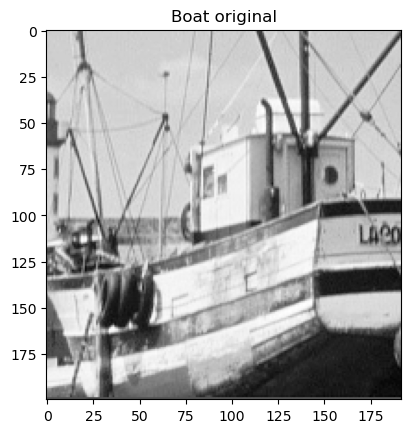

In [136]:
imgShow(boat)
plt.title("Boat original")

## Boat block:

Image of an 8x8 block with top-left pixel @
(x,y)
- x = 8 x (number of letters in first name-1)+1 = 8*(5-1)+1 = 33
- y = 8 x (number of letters in last name-1)+1 = 8*(5-1)+1 = 33

(x,y) = (33,33)

First Name: Aarzu (5 letters)
Last Name: Gupta (5 letters)

Text(0.5, 1.0, 'Boat block')

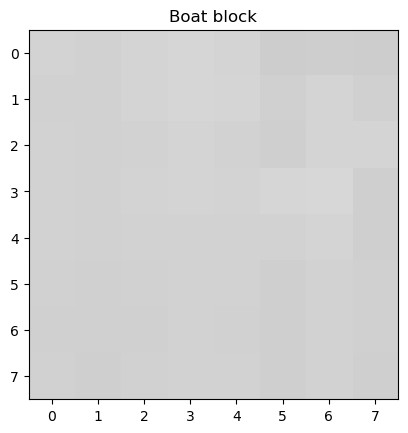

In [137]:
name_block = select_block(boat, 33, 33, 8)
imgShow(name_block)
plt.title("Boat block")

## Sensed (S) boat pixels:

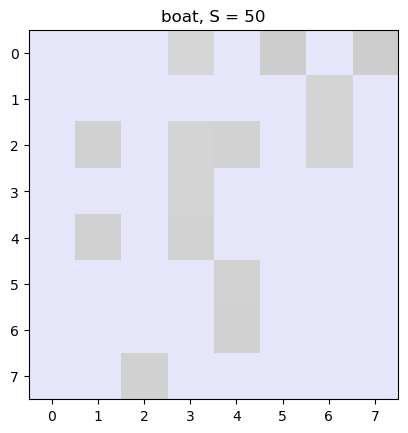

In [154]:
# S = 50
corrupt_name_block_50 = corrupt_block(name_block, 50)
color_sensed(corrupt_name_block_50, 50, "boat")

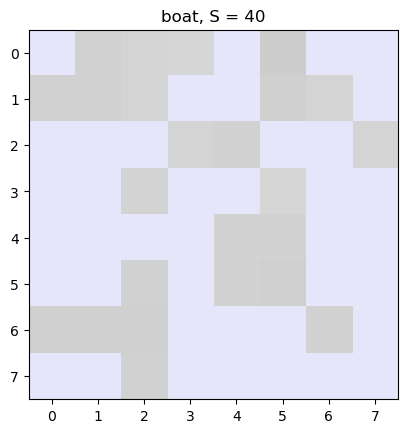

In [155]:
# S = 40
corrupt_name_block_40 = corrupt_block(name_block, 40)
color_sensed(corrupt_name_block_40, 40, "boat")

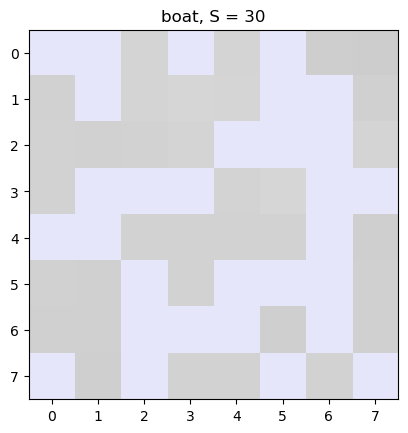

In [156]:
# S = 30
corrupt_name_block_30 = corrupt_block(name_block, 30)
color_sensed(corrupt_name_block_30, 30, "boat")

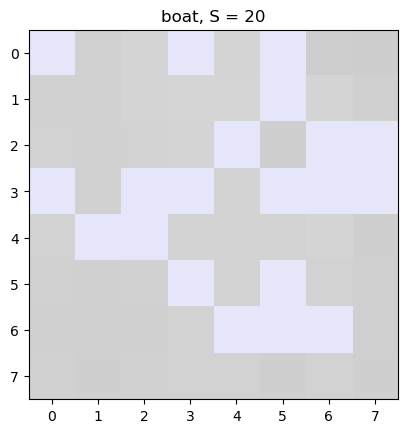

In [157]:
# S = 20
corrupt_name_block_20 = corrupt_block(name_block, 20)
color_sensed(corrupt_name_block_20, 20, "boat")

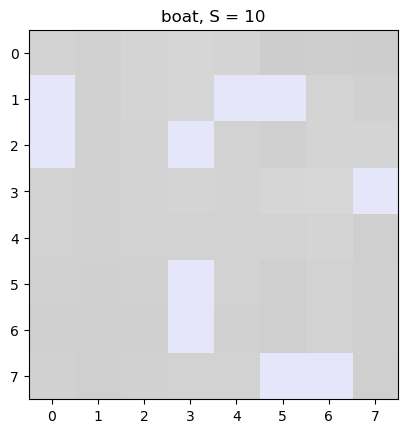

In [158]:
# S = 10
corrupt_name_block_10 = corrupt_block(name_block, 10)
color_sensed(corrupt_name_block_10, 10, "boat")

## Nature image:

Text(0.5, 1.0, 'Nature original')

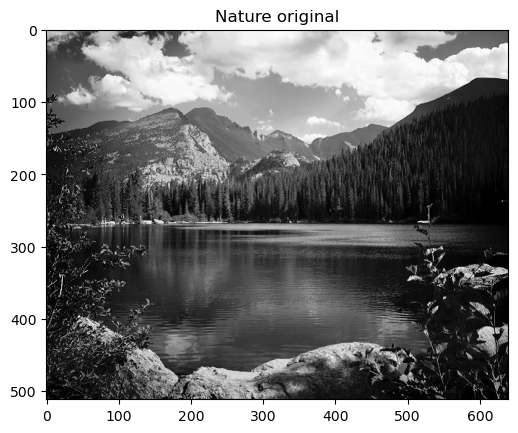

In [29]:
imgShow(nature)
plt.title("Nature original")

## Nature block:

Image of an 16x16 block with top-left pixel @
(x,y)
- x =  16 x (alphabet position of first initial-1)+1 = 16*(1-1)+1 = 1
- y = 16 x (alphabet position of last initial-1)+1 = 16*(7-1)+1 = 97

(x,y) = (1,97)

First Initial: A (1st alphabet position)
Last Initial: G (7th alphabet position)

Text(0.5, 1.0, 'Nature block')

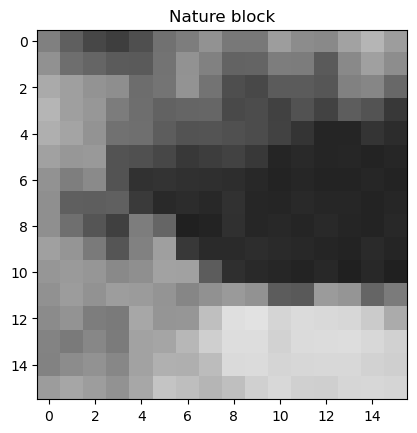

In [124]:
initial_block = select_block(nature, 1, 97, 16)
imgShow(initial_block)
plt.title("Nature block")

## Sensed (S) nature pixels:

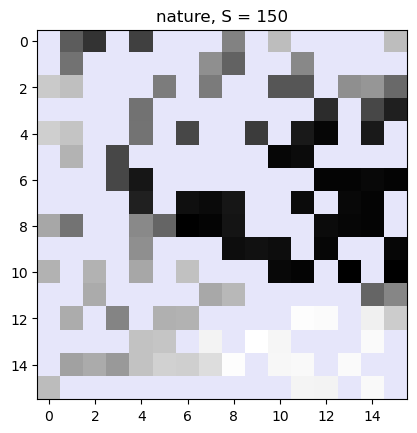

In [130]:
# S = 150
corrupt_initial_block_150 = corrupt_block(initial_block, 150)
color_sensed(corrupt_initial_block_150, 150, "nature")

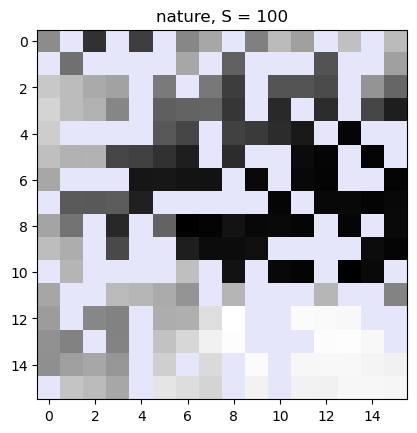

In [131]:
# S = 100
corrupt_initial_block_100n = corrupt_block(initial_block, 100)
color_sensed(corrupt_initial_block_100n, 100, "nature")

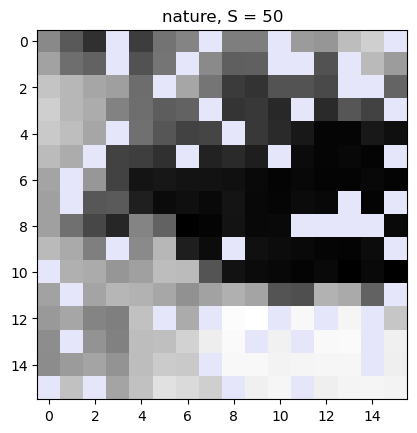

In [132]:
# S = 50
corrupt_initial_block_50n = corrupt_block(initial_block, 50)
color_sensed(corrupt_initial_block_50n, 50, "nature")

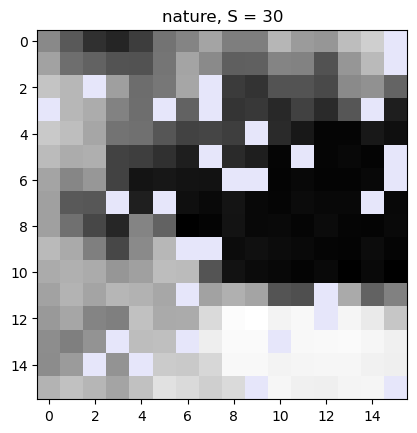

In [133]:
# S = 30
corrupt_initial_block_30n = corrupt_block(initial_block, 30)
color_sensed(corrupt_initial_block_30n, 30, "nature")

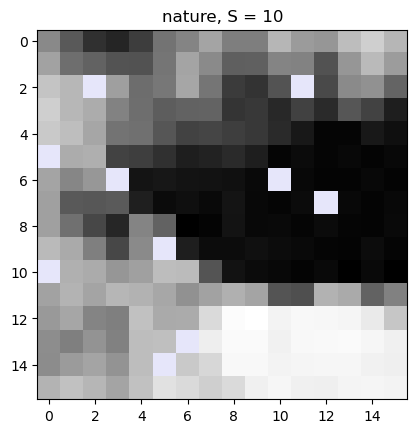

In [134]:
# S = 10
corrupt_initial_block_10n = corrupt_block(initial_block, 10)
color_sensed(corrupt_initial_block_10n, 10, "nature")

CHECKPOINT #2:
=

- Ensure you can create and sample the basis vector matrix
    - Visualization (image) of basis vector matrix  (both Ks)
- Implement LASSO regression to estimate basis vector (DCT) coefficients for a single block
    - MSE as a function of regularization parameter (varying S)
    - LASSO reconstruction using best regularization parameter value
- Cross-validation

## DCT to get basis vector matrix:

In [36]:
def basis_matrix(block):
    k = len(block)
    basis_vector_matrix = []
    for i in range(k*k):
        new_list = []
        basis_vector_matrix.append(new_list)
    index = 0
    for x in range(1, k+1):
        for y in range(1,k+1):
            for u in range(1, k+1):
                for v in range(1, k+1):
                    if u == 1:
                        alpha = (1/k)**.5
                    else:
                        alpha = (2/k)**.5
                    if v == 1:
                        beta = (1/k)**.5
                    else:
                        beta = (2/k)**.5
                    curr = alpha * beta * math.cos((math.pi * (2*x-1)*(u-1))/(2*k))*math.cos((math.pi * (2*y-1)*(v-1))/(2*k))
                    basis_vector_matrix[index].append(curr)
            index += 1
    return basis_vector_matrix

In [37]:
def plot_basis(block):
    k = len(block)
    bm = basis_matrix(block)
    plt.imshow(bm, cmap='Greys_r')
    plt.title(f"Basis Vector Matrix (k = {k})")
    plt.show()

In [38]:
def prep_basis_block(bm, block_rast):
    # remove constants col
    bm_no_const = np.delete(bm, 0, axis=1)
    # remove invalid pixels
    rem = []
    for i in range(len(block_rast)):
        if(np.isnan(block_rast[i])):
            rem.append(i)
    final_block_rast = np.delete(block_rast, rem)
    final_bm = np.delete(bm_no_const, rem, axis = 0)
    return final_block_rast, final_bm

## Lasso (alpha vs. MSE, block recovery):
- ### Cross-Validation (choose alpha)
- ### Median-filtering

In [56]:
# TODO: CROSS-VALIDATION

In [39]:
# use package?
def rasterize(block):
    rasterized_block = []
    for y in range(len(block)):
        for x in range(len(block)):
            rasterized_block.append(block[x][y])
    return rasterized_block

In [40]:
def unrasterize(rec_img):
    new_list = []
    block = []
    block.append(new_list)
    k = (int)(len(rec_img)**.5)
    for ind in range(k):
        list_ind = ind
        while(list_ind < k*k):
            block[ind].append(rec_img[list_ind])
            list_ind += k
        if(ind < k - 1):
            new_list = []
            block.append(new_list)
    return block

In [41]:
def alpha_mse(block, bm, final_block_rast, final_bm, alpha_list):
    model = Lasso(max_iter=1e5, fit_intercept=True)
    mse_list = []
    coefficients = []
    
    # TODO: add CV
    
    for alpha in alpha_list: 
        model.set_params(alpha=alpha)
        model.fit(final_bm, final_block_rast)
        
        # get coefficients (weights) from model
        curr_coefficients = [model.intercept_ / bm[0][0]]
        for coefficient in model.coef_:
            curr_coefficients.append(coefficient)
        coefficients.append(curr_coefficients)

        # recover the image
        recovered_img = np.dot(bm, curr_coefficients)
        recovered_img = unrasterize(recovered_img)
        
        # calculate MSE
        mse = np.mean((np.array(recovered_img) - np.array(block)) ** 2)
        mse_list.append(mse)
    return mse_list, coefficients

In [168]:
def checkpt2(block, S, filt):
    k = len(block)
    
    bm = basis_matrix(block)
    plot_basis(block)
    
    sensed_block = corrupt_block(block, S)
    block_rast = rasterize(sensed_block)
    final_block = prep_basis_block(bm, block_rast)[0]
    final_bm = prep_basis_block(bm, block_rast)[1]
    
    alpha_list = np.logspace(-6, 6, num=100) # change to -6, 6?
    alpha_mse_res = alpha_mse_NEW(block, bm, final_block, final_bm, alpha_list, S) # NEW
    mse_list = alpha_mse_res[0]
    coefficients = alpha_mse_res[1]
    
    plot_alpha_mse(alpha_list, mse_list, k, S)
    
    recover_img(bm, mse_list, alpha_list, coefficients, k, S, filt)

In [ ]:
def random_subset_cv(X, rasterImage, fullBasis, alphas, coords):
    n = X.shape[0]
    k = max(1, n // 6)
    cv = ShuffleSplit(n_splits=20, test_size=k, random_state=0)

    scores = []
    for alpha in alphas:
        lasso = Lasso(alpha=alpha, fit_intercept=False)
        model_scores = []
        for train_index, test_index in cv.split(X):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = rasterImage[train_index], rasterImage[test_index]
            # reconstruction
            lasso.fit(X_train, y_train)
            weights = lasso.coef_
            weights = weights.reshape(-1, 1)
            for idx in test_index:
                pixVal = rasterImage[idx]
                x = coords[idx][0]
                y = coords[idx][1]
                guess = np.dot(fullBasis[x * BLOCK_SIZE + y], weights)
                model_scores.append((pixVal - guess) ** 2)
        scores.append(np.mean(model_scores))
    optimal_alpha = alphas[np.argmin(scores)]
    return optimal_alpha

In [ ]:
def calcMSE(reconstruction, realImage):
    RSE = []
    reconstruction = reconstruction.reshape(-1, 1)
    realImage = realImage.reshape(-1, 1)
    for i in range(len(reconstruction)):
        RSE.append((reconstruction[i] - realImage[i]) ** 2)
    return np.mean(RSE)

In [ ]:
def dct_lasso(image, full_basis_vectors):
    A = []
    rasterIm = image.reshape(-1, 1)
    # rasterize each basis vector as a column in the matrix, 64x64 matrix, each basis vector is 8x8, (64,1) x 64
    # recov = rasterIm.reshape(8,8)
    removedNana = []
    # remove nan pixels
    for pixel in range(len(rasterIm)):
        currPix = rasterIm[pixel]
        if (not (np.isnan(currPix))):
            removedNana.append(currPix)
    removedNana = np.array(removedNana)

    storeCoords = []
    # remove the basis vectors from the nan pixels
    for x in range(len(image)):
        for y in range(len(image[0])):
            pixVal = image[x][y]
            if not (np.isnan(pixVal)):
                storeCoords.append([x, y])
                A.append(full_basis_vectors[(x * BLOCK_SIZE) + y])

    A = np.array(A)
    alpha = random_subset_cv(A, removedNana, full_basis_vectors, np.logspace(-6, 6), storeCoords)

    lasso = Lasso(alpha=alpha, fit_intercept=False)

    lasso.fit(A, removedNana)
    weights = lasso.coef_
    weights = weights.reshape(-1, 1)

    # reconstruction
    for x in range(len(image)):
        for y in range(len(image[0])):
            pixVal = image[x][y]
            if ((np.isnan(pixVal))):
                pixVal = np.dot(full_basis_vectors[x * BLOCK_SIZE + y], weights)
                image[x][y] = pixVal
    return image, alpha